In [1]:
import sklearn
import csv
import pandas as pd
import numpy as np
import cv2

In [2]:
train = pd.read_csv('C:/Users/umang/My_Jupyter_Book/AOBD/my_training_set.csv')
train = pd.DataFrame(train)
train.drop(['id'], axis=1,inplace=True)
train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,6,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,6,0


In [3]:
colName = list(train.columns.values)
len(colName)-1

43

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=train[colName[0:len(colName)-2]]  # Features
y=train['label']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.958405414139878


In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

C:\Users\umang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


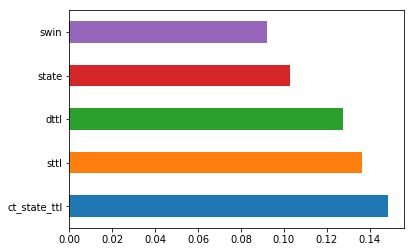

dur                  0.009118
proto                0.008614
service              0.009348
state                0.103001
spkts                0.003133
dpkts                0.003153
sbytes               0.014192
dbytes               0.004024
rate                 0.012899
sttl                 0.136411
dttl                 0.127498
sload                0.011015
dload                0.037878
sloss                0.004029
dloss                0.003601
sinpkt               0.019629
dinpkt               0.010061
sjit                 0.006490
djit                 0.006027
swin                 0.092309
stcpb                0.008222
dtcpb                0.006220
dwin                 0.010852
tcprtt               0.007610
synack               0.008721
ackdat               0.006522
smean                0.020935
dmean                0.010189
trans_depth          0.003359
response_body_len    0.000941
ct_srv_src           0.017594
ct_state_ttl         0.148686
ct_dst_ltm           0.007264
ct_src_dpo

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
print(feat_importances)

No handles with labels found to put in legend.


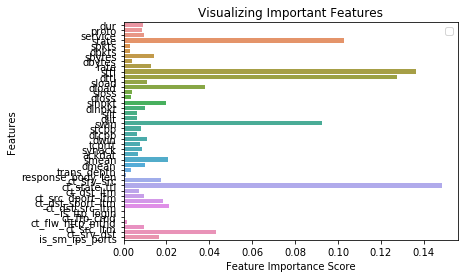

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.953258540480206


# Testing

In [13]:
test = pd.read_csv('E:/Umang_clg/Sem6/AOBD/Group_Project/test_datasets/my_testing_set.csv')
test = pd.DataFrame(test)
test.drop(['id'], axis=1,inplace=True)
test.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,6,0
1,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,6,0
2,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,6,0
3,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,6,0
4,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,6,0


In [14]:
colName = list(test.columns.values)

X_test = test[colName[0:42]]  # Features
y_test = test['label']  # Labels


In [15]:

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8662974299178934
